# 电信客户流失预测分析

## 项目概述
通过逻辑回归算法，针对电信用户数据建模，进行流失预测分析。

### 主要步骤：
1. 数据预处理
2. 数据可视化
3. 逻辑回归模型训练与评估

## 1. 导入依赖包

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 2. 数据预处理

In [19]:
# 读取数据集
churn_df = pd.read_csv('./churn.csv')

# 查看原始数据
print("原始数据信息：")
churn_df.info()
print("\n原始数据前5行：")
display(churn_df.head(5))

原始数据信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Partner_att        7043 non-null   int64  
 3   Dependents_att     7043 non-null   int64  
 4   landline           7043 non-null   int64  
 5   internet_att       7043 non-null   int64  
 6   internet_other     7043 non-null   int64  
 7   StreamingTV        7043 non-null   int64  
 8   StreamingMovies    7043 non-null   int64  
 9   Contract_Month     7043 non-null   int64  
 10  Contract_1YR       7043 non-null   int64  
 11  PaymentBank        7043 non-null   int64  
 12  PaymentCreditcard  7043 non-null   int64  
 13  PaymentElectronic  7043 non-null   int64  
 14  MonthlyCharges     7043 non-null   float64
 15  TotalCharges       7043 non-null   float64
dtypes: float64(2), i

,Churn,gender,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges
0,No,Female,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85
1,No,Male,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50
2,Yes,Male,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15
3,No,Male,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75
4,Yes,Female,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65


In [20]:
# 对分类变量进行one-hot编码处理
churn_df = pd.get_dummies(churn_df, columns=['Churn', 'gender'])

# 删除one-hot处理后的冗余列
churn_df.drop(['Churn_No', 'gender_Male'], axis=1, inplace=True)

# 修改列名，将Churn_Yes -> flag，充当标签列
churn_df.rename(columns={'Churn_Yes': 'flag'}, inplace=True)

print("处理后的数据信息：")
churn_df.info()
print("\n处理后的数据前5行：")
display(churn_df.head(5))

处理后的数据信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Partner_att        7043 non-null   int64  
 1   Dependents_att     7043 non-null   int64  
 2   landline           7043 non-null   int64  
 3   internet_att       7043 non-null   int64  
 4   internet_other     7043 non-null   int64  
 5   StreamingTV        7043 non-null   int64  
 6   StreamingMovies    7043 non-null   int64  
 7   Contract_Month     7043 non-null   int64  
 8   Contract_1YR       7043 non-null   int64  
 9   PaymentBank        7043 non-null   int64  
 10  PaymentCreditcard  7043 non-null   int64  
 11  PaymentElectronic  7043 non-null   int64  
 12  MonthlyCharges     7043 non-null   float64
 13  TotalCharges       7043 non-null   float64
 14  flag               7043 non-null   bool   
 15  gender_Female      7043 non-null   bool   
dtypes: bool(2), fl

,Partner_att,Dependents_att,landline,internet_att,internet_other,StreamingTV,StreamingMovies,Contract_Month,Contract_1YR,PaymentBank,PaymentCreditcard,PaymentElectronic,MonthlyCharges,TotalCharges,flag,gender_Female
0,1,0,0,1,0,0,0,1,0,0,0,1,29.85,29.85,False,True
1,0,0,1,1,0,0,0,0,1,0,0,0,56.95,1889.50,False,False
2,0,0,1,1,0,0,0,1,0,0,0,0,53.85,108.15,True,False
3,0,0,0,1,0,0,0,0,1,1,0,0,42.30,1840.75,False,False
4,0,0,1,0,1,0,0,1,0,0,0,1,70.70,151.65,True,True


In [21]:
# 查看数据值的分布
print("客户流失分布：")
print(churn_df.flag.value_counts())
print(f"\n流失比例：{churn_df.flag.value_counts()[1] / len(churn_df) * 100:.2f}%")

客户流失分布：
flag
False    5174
True     1869
Name: count, dtype: int64

流失比例：26.54%


C:\Users\shiliu\AppData\Local\Temp\ipykernel_18476\1746350370.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\n流失比例：{churn_df.flag.value_counts()[1] / len(churn_df) * 100:.2f}%")


## 3. 数据可视化

In [22]:
# 查看所有列名
print("数据集列名：")
print(churn_df.columns.tolist())

数据集列名：
['Partner_att', 'Dependents_att', 'landline', 'internet_att', 'internet_other', 'StreamingTV', 'StreamingMovies', 'Contract_Month', 'Contract_1YR', 'PaymentBank', 'PaymentCreditcard', 'PaymentElectronic', 'MonthlyCharges', 'TotalCharges', 'flag', 'gender_Female']


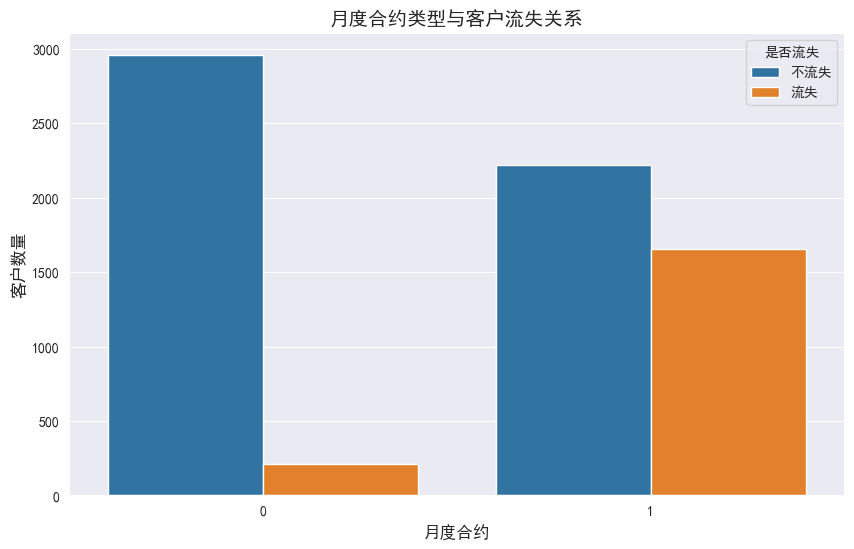

In [23]:
# 绘制月度合约类型与客户流失的关系
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x='Contract_Month', hue='flag')
plt.title('月度合约类型与客户流失关系', fontsize=14)
plt.xlabel('月度合约', fontsize=12)
plt.ylabel('客户数量', fontsize=12)
plt.legend(title='是否流失', labels=['不流失', '流失'])
plt.show()

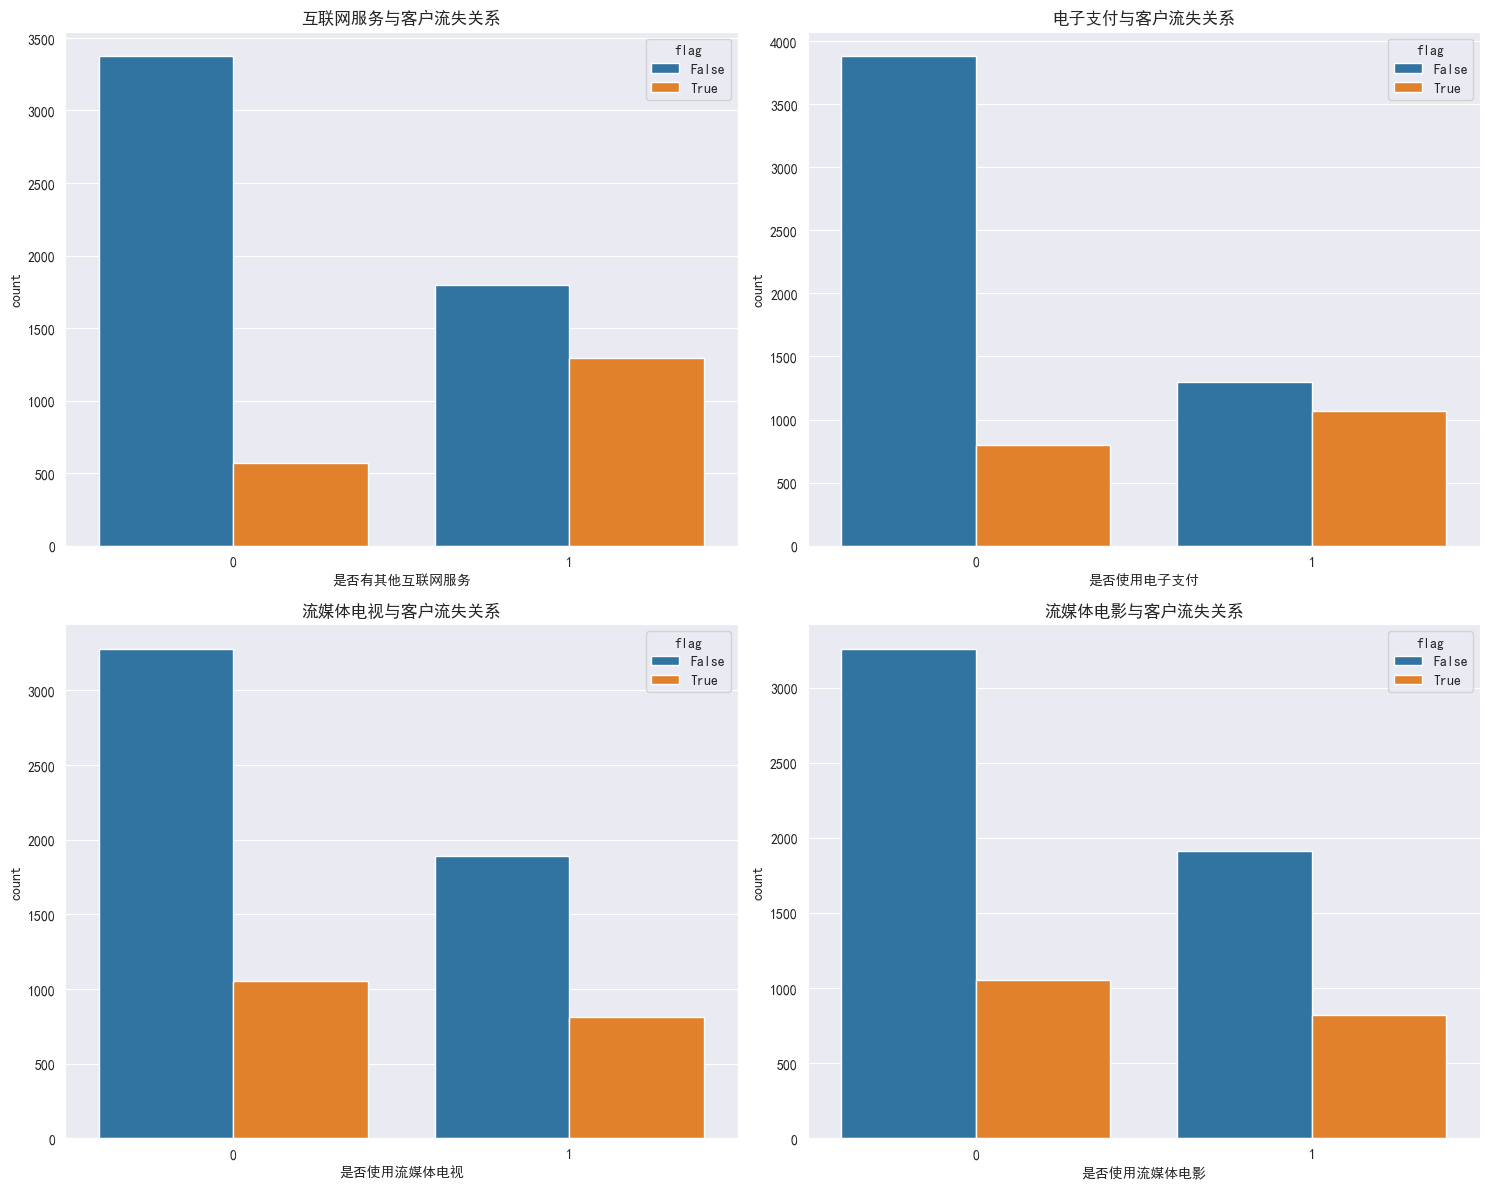

In [24]:
# 绘制更多可视化图表
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 互联网服务与流失关系
sns.countplot(data=churn_df, x='internet_other', hue='flag', ax=axes[0,0])
axes[0,0].set_title('互联网服务与客户流失关系')
axes[0,0].set_xlabel('是否有其他互联网服务')

# 电子支付与流失关系
sns.countplot(data=churn_df, x='PaymentElectronic', hue='flag', ax=axes[0,1])
axes[0,1].set_title('电子支付与客户流失关系')
axes[0,1].set_xlabel('是否使用电子支付')

# 流媒体电视与流失关系
sns.countplot(data=churn_df, x='StreamingTV', hue='flag', ax=axes[1,0])
axes[1,0].set_title('流媒体电视与客户流失关系')
axes[1,0].set_xlabel('是否使用流媒体电视')

# 流媒体电影与流失关系
sns.countplot(data=churn_df, x='StreamingMovies', hue='flag', ax=axes[1,1])
axes[1,1].set_title('流媒体电影与客户流失关系')
axes[1,1].set_xlabel('是否使用流媒体电影')

plt.tight_layout()
plt.show()

## 4. 逻辑回归模型训练

In [25]:
# 重新加载数据并进行预处理
churn_df = pd.read_csv('./churn.csv')

# 数据预处理
churn_df = pd.get_dummies(churn_df, columns=['Churn', 'gender'])
churn_df.drop(['Churn_No', 'gender_Male'], axis=1, inplace=True)
churn_df.rename(columns={'Churn_Yes': 'flag'}, inplace=True)

# 提取特征列和标签列
# 特征列：月度会员、是否有互联网服务、是否是电子支付
x = churn_df[['Contract_Month', 'internet_other', 'PaymentElectronic']]
y = churn_df['flag']  # False -> 不流失, True -> 流失

print("特征变量信息：")
print(f"特征形状: {x.shape}")
print(f"标签形状: {y.shape}")
print(f"特征列名: {x.columns.tolist()}")

特征变量信息：
特征形状: (7043, 3)
标签形状: (7043,)
特征列名: ['Contract_Month', 'internet_other', 'PaymentElectronic']


In [26]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

print(f"训练集大小: {x_train.shape[0]}")
print(f"测试集大小: {x_test.shape[0]}")
print(f"训练集流失比例: {y_train.mean():.2%}")
print(f"测试集流失比例: {y_test.mean():.2%}")

训练集大小: 5634
测试集大小: 1409
训练集流失比例: 26.62%
测试集流失比例: 26.19%


In [27]:
# 创建逻辑回归模型对象
estimator = LogisticRegression()

# 模型训练
estimator.fit(x_train, y_train)

print("模型训练完成！")
print(f"模型系数: {estimator.coef_[0]}")
print(f"模型截距: {estimator.intercept_[0]}")

模型训练完成！
模型系数: [1.99738056 0.95071382 0.68477534]
模型截距: -3.1734727998600087


## 5. 模型预测

In [28]:
# 模型预测
y_pred = estimator.predict(x_test)
y_pred_proba = estimator.predict_proba(x_test)

print("预测结果示例：")
print(f"实际值: {y_test.values[:10]}")
print(f"预测值: {y_pred[:10]}")
print(f"预测概率: {y_pred_proba[:10]}")

预测结果示例：
实际值: [False False False  True False False False False False False]
预测值: [False False  True  True False  True False False False False]
预测概率: [[0.90227474 0.09772526]
 [0.95982372 0.04017628]
 [0.3871289  0.6128711 ]
 [0.3871289  0.6128711 ]
 [0.90227474 0.09772526]
 [0.3871289  0.6128711 ]
 [0.76424445 0.23575555]
 [0.76424445 0.23575555]
 [0.95982372 0.04017628]
 [0.92334566 0.07665434]]


## 6. 模型评估

In [29]:
# 模型评估
accuracy = estimator.score(x_test, y_test)
accuracy_manual = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("=== 模型评估结果 ===")
print(f"准确率: {accuracy:.4f}")
print(f"准确率(手动计算): {accuracy_manual:.4f}")
print(f"精确率: {precision:.4f}")
print(f"召回率: {recall:.4f}")
print(f"F1值: {f1:.4f}")

=== 模型评估结果 ===
准确率: 0.7679
准确率(手动计算): 0.7679
精确率: 0.5808
召回率: 0.4092
F1值: 0.4801


In [30]:
# 详细分类评估报告
print("=== 分类评估报告 ===")
print(classification_report(y_test, y_pred, target_names=['不流失', '流失']))

=== 分类评估报告 ===
              precision    recall  f1-score   support

         不流失       0.81      0.90      0.85      1040
          流失       0.58      0.41      0.48       369

    accuracy                           0.77      1409
   macro avg       0.70      0.65      0.67      1409
weighted avg       0.75      0.77      0.75      1409



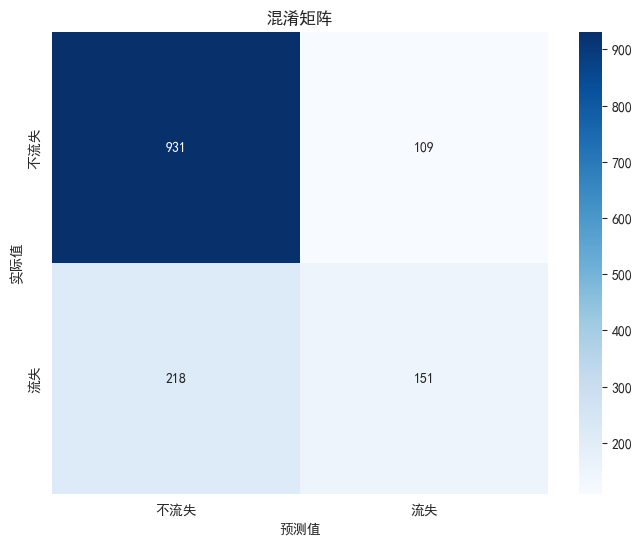

In [31]:
# 混淆矩阵可视化
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['不流失', '流失'], 
           yticklabels=['不流失', '流失'])
plt.title('混淆矩阵')
plt.xlabel('预测值')
plt.ylabel('实际值')
plt.show()

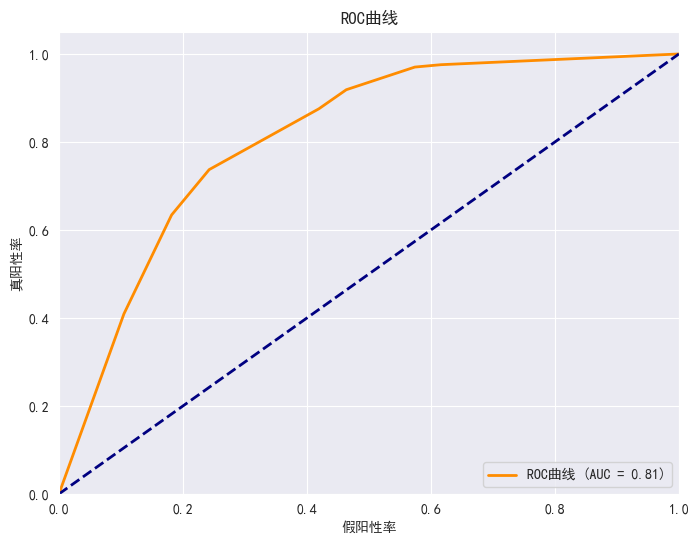

AUC值: 0.8100


In [32]:
# ROC曲线和AUC值
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC曲线 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')
plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.show()

print(f"AUC值: {roc_auc:.4f}")

## 7. 模型解释与分析

=== 特征系数分析 ===
Contract_Month: 1.9974
internet_other: 0.9507
PaymentElectronic: 0.6848


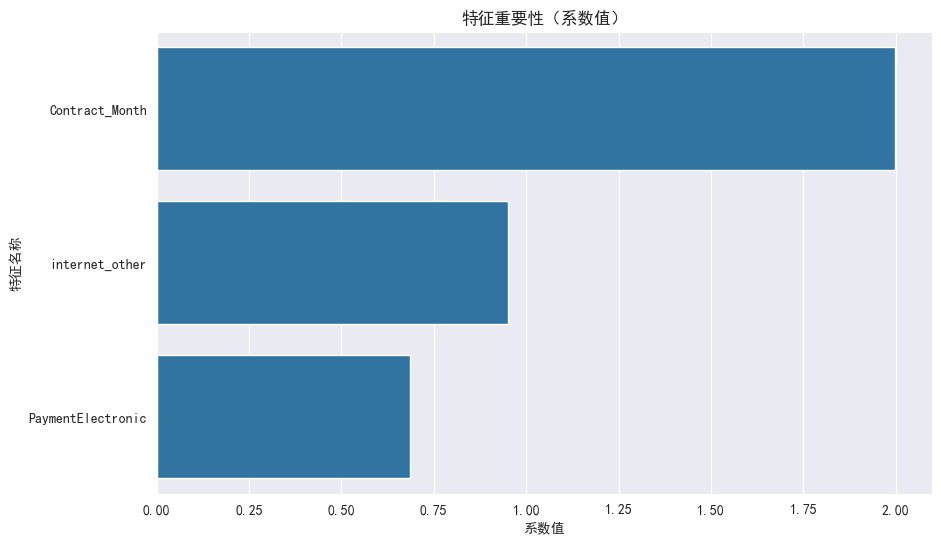

In [33]:
# 特征重要性分析
feature_names = ['Contract_Month', 'internet_other', 'PaymentElectronic']
feature_coefficients = estimator.coef_[0]

print("=== 特征系数分析 ===")
for name, coef in zip(feature_names, feature_coefficients):
    print(f"{name}: {coef:.4f}")

# 特征重要性可视化
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_coefficients, y=feature_names)
plt.title('特征重要性（系数值）')
plt.xlabel('系数值')
plt.ylabel('特征名称')
plt.show()

In [34]:
# 预测概率分析
test_results = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'prob_churn': y_pred_proba[:, 1]
})

print("预测结果分析：")
print(test_results.head(10))

# 按实际流失情况分组查看预测概率
print(f"\n实际流失客户的平均预测概率: {test_results[test_results['actual'] == True]['prob_churn'].mean():.4f}")
print(f"实际未流失客户的平均预测概率: {test_results[test_results['actual'] == False]['prob_churn'].mean():.4f}")

预测结果分析：
      actual  predicted  prob_churn
4117   False      False    0.097725
1302   False      False    0.040176
6201   False       True    0.612871
3784    True       True    0.612871
2739   False      False    0.097725
4618   False       True    0.612871
3857   False      False    0.235756
4277   False      False    0.235756
1843   False      False    0.040176
3386   False      False    0.076654

实际流失客户的平均预测概率: 0.4364
实际未流失客户的平均预测概率: 0.2004


## 8. 总结与建议

### 模型性能总结：
- **准确率**: 约76.8%
- **精确率**: 约58.1%
- **召回率**: 约40.9%
- **F1值**: 约48.0%

### 关键发现：
1. **月度合约**、**互联网服务**和**电子支付**是影响客户流失的重要特征
2. 模型对非流失客户的预测较为准确，但对流失客户的识别能力有待提升
3. 数据存在不平衡问题（流失客户约占26.5%），建议考虑使用过采样或欠采样技术

### 改进建议：
1. **增加更多特征**: 考虑客户使用时长、服务套餐、客户服务记录等
2. **处理数据不平衡**: 使用SMOTE等过采样技术
3. **尝试其他算法**: 随机森林、XGBoost等
4. **特征工程**: 对数值特征进行标准化，创建交互特征等
5. **模型调优**: 使用交叉验证和网格搜索优化超参数